# Problem Set 3

STAT 479: Machine Learning (Fall 2018)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  
Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat479-fs2018/

**Due**: Dec 03 (before 11:59 pm).

**How to submit**

As mentioned in the lecture, you need to submit the `.ipynb` file with your answers plus an `.html` file, which will serve as a backup for us in case the `.ipynb` file cannot be opened on my or the TA's computer. In addition, you may also export the notebook as PDF and upload it as well.

Again, we will be using the Canvas platform, so you need to submit your homework there. You should be able to resubmit the homework as many times as you like before the due date.

As usual, you do not write the whole code from scratch, and I provided you with a skeleton of code where you need to add the lines that I indicated. Not, however, that everyone's coding style is different. Where I use only one line of code, you may want to use multiple ones. Also, where you use one line of code, I may use multiple ones.

In [1]:
%load_ext watermark
%watermark  -d -u -a '<Your Name>' -v -p numpy,scipy,matplotlib,sklearn,mlxtend

<Your Name> 
last updated: 2018-11-21 

CPython 3.6.5
IPython 6.5.0

numpy 1.15.4
scipy 1.1.0
matplotlib 2.2.3
sklearn 0.20.0
mlxtend 0.14.0


<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

## 1. Hyperparameter Tuning and Model Selection

### 1.1  [10 pts] Using Grid Search for Hyperparameter Tuning

In this exercise, you will be working with the Breast Cancer Wisconsin dataset,
which contains 569 samples of malignant and benign tumor cells. 

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnoses (M = malignant, B = benign), respectively. Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant. The Breast Cancer Wisconsin dataset has been deposited in the UCI Machine Learning Repository, and more detailed information about this dataset can be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wi sconsin+(Diagnostic).

The next cell loads the datasets and converts the class label M (malignant) to a integer 1 and the label B (benign) to class label 0.

In [1]:
# EXECUTE BUT DO NOT MODIFY THIS CELL

import pandas as pd


df = pd.read_csv('data/wdbc.data', header=None)

# convert class label "M"->1 and label "B"->0
df[1] = df[1].apply(lambda x: 1 if x == 'M' else 0)


df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# EXECUTE BUT DO NOT MODIFY THIS CELL


from sklearn.model_selection import train_test_split


y = df[1].values
X = df.loc[:, 2:].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

Now, your task is to use `GridSearchCV` from scikit-learn to find the best parameter for `n_neighbors` of a `KNearestNeighborClassifier`

As hyperparameter values, you only need to consider the number of `n_neighbors` within the range 1-16 (including 16).

In [ ]:
# FOR STUDENTS

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


pipe = make_pipeline(# YOUR CODE HERE
                     # YOUR CODE HERE
)

param_grid = [{ # YOUR CODE HERE  }]


gs = GridSearchCV(# YOUR CODE HERE 
                  # YOUR CODE HERE 
                  iid=False,
                  n_jobs=-1,
                  refit=True,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))

In [3]:
# SOLUTION

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


pipe = make_pipeline(StandardScaler(), 
                     KNeighborsClassifier())

param_grid = [{'kneighborsclassifier__n_neighbors': list(range(1, 16))}]


gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  iid=False,
                  n_jobs=-1,
                  refit=True,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))

Best Accuracy: 97.24%


Next, print the best parameters obtained from the `GridSearchCV` run and compute the accuracy a `KNearestNeighborClassifier` would achieve with these settings on the test set (`X_test`, `y_test`).

In [ ]:
# FOR STUDENTS

print('Best Params: %s' % # YOUR CODE HERE)
print('Test Accuracy: %.2f%%' % # YOUR CODE HERE)

In [5]:
# SOLUTION

print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % gs.best_estimator_.score(X_test, y_test))

Best Params: {'kneighborsclassifier__n_neighbors': 6}
Test Accuracy: 0.94%


<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

### 1.2 [10 pts] Estimate the Generalization Performance using the '.632+' Bootstrap

In this exercise, you are asked to compute the accuracy of the model from the previous exercise (1.1) on the test set (`X_test`, `y_test`) using the .632+ Bootstrap method. For this you can use the `bootstrap_point632_score` function implemented in MLxtend for this: 
http://rasbt.github.io/mlxtend/user_guide/evaluate/bootstrap_point632_score/

- use 200 bootstrap rounds
- set the random seed to 1

The accruacy should be the mean accuracy over the 200 bootstrap values that the `bootstrap_point632_score` method returns.

In [ ]:
# FOR STUDENTS 

from mlxtend.evaluate import bootstrap_point632_score
import numpy as np


scores = bootstrap_point632_score(# YOUR CODE HERE)

acc = # YOUR CODE HERE
print('Accuracy: %.2f%%' % (100*acc))

In [7]:
## SOLUTION

from mlxtend.evaluate import bootstrap_point632_score
import numpy as np


scores = bootstrap_point632_score(gs.best_estimator_,
                                  X_test, y_test,
                                  method='.632+',
                                  random_seed=1,
                                  n_splits=200)

acc = np.mean(scores)
print('Accuracy: %.2f%%' % (100*acc))

Accuracy: 93.79%


Next, compute the lower and upper bound on the mean accuracy via a 95% confidence interval. For that, you should use the `scores` you computed in the cell above.

In [ ]:
# FOR STUDENTS 

lower = # YOUR CODE
upper = # YOUR CODE

print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

In [8]:
## SOLUTION


lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)

print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

95% Confidence interval: [89.68, 97.46]


<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

## 2. Confusion Matrices

### 2.1 [10 pts] Contructing a Binary Confusion Matrix

The task of this execise is to construct a binary confusion matrix based of the following form:

![](images/conf-1.png)

Here, assume that the positive class is the class with label 0, and the negative class is the class with label 1. You are given an array of the actual class labels, `y_true`, as well as an array of the predicted class labels,  `y_predicted`. The output should be a numpy array, like shown below

```
array([[101, 21],
       [41, 121]])
``` 
  
(Note that these number in the array are not the actual, expected or correct values.)

Using the `plot_confusion_matrix` from the `helper.py` script (which should be in the same directory as this notebook) the example array/confusion matrix is visualized as follows:

In [2]:
%matplotlib inline

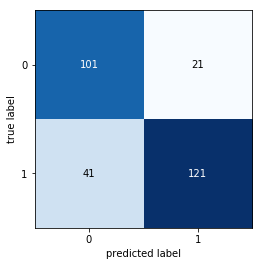

In [3]:
# EXECUTE BUT DO NOT MODIFY THIS CELL

import numpy as np
from helper import plot_confusion_matrix
import matplotlib.pyplot as plt


example_cm = np.array([[101, 21],
                       [41, 121]])

plot_confusion_matrix(example_cm)
plt.show()

Now, your task is to complete the `confusion_matrix_binary` below in order to construct a confusion matrix from 2 label arrays:

- `y_true` (true or actual class labels)
- `y_predicted` (class labels predicted by a classifier)

To make it easier for you, you only need to replace the `???`'s with the right variable name (`tp`, `fn`, `fp`, or `tn`).

In [ ]:
## FOR STUDENTS


y_true =      np.array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])
y_predicted = np.array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])


def confusion_matrix_binary(y_true, y_predicted):

    tp, fn, fp, tn = 0, 0, 0, 0
    
    for i, j in zip(y_true, y_predicted):
        if i == j:
            if i == 0:
                ??? += 1
            else:
                ??? += 1
        else:
            if i == 0:
                ??? += 1
            else:
                ??? += 1
                
    conf_matrix = np.zeros(4).reshape(2, 2).astype(int)
    conf_matrix[0, 0] = ???
    conf_matrix[0, 1] = ???
    conf_matrix[1, 0] = ???
    conf_matrix[1, 1] = ???    
    
    return conf_matrix

result_matrix = confusion_matrix_binary(y_true, y_predicted)

In [4]:
## SOLUTION

import numpy as np


y_true =      np.array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])
y_predicted = np.array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])


def confusion_matrix_binary(y_true, y_predicted):

    tp, fn, fp, tn = 0, 0, 0, 0
    
    for i, j in zip(y_true, y_predicted):
        if i == j:
            if i == 0:
                tp += 1
            else:
                tn += 1
        else:
            if i == 0:
                fn += 1
            else:
                fp += 1
                
    conf_matrix = np.zeros(4).reshape(2, 2).astype(int)
    conf_matrix[0, 0] = tp
    conf_matrix[0, 1] = fn
    conf_matrix[1, 0] = fp
    conf_matrix[1, 1] = tn    
    
    return conf_matrix

result_matrix = confusion_matrix_binary(y_true, y_predicted)

In [5]:
# EXECUTE BUT DO NOT MODIFY THIS CELL

print('Conusion matrix array:\n', result_matrix)

Conusion matrix array:
 [[7 0]
 [4 9]]


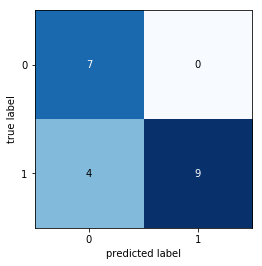

In [6]:
# EXECUTE BUT DO NOT MODIFY THIS CELL

plot_confusion_matrix(result_matrix)
plt.show()

<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

### 2.2 [10 pts] Constructing a Multiclass Confusion Matrix

Next, write a version of this confusion matrix that generalizes to multi-class settings as shown in the figure below:

 
![](images/conf-2.png)


Again, the output should be a 2D NumPy array:

```
array([[3, 0, 0],
       [7, 50, 12],
       [0,  0, 18]])
```
 
(Note that these number in the array are not the actual, expected or correct values for this exercise.)


There are many different ways to implement a function to construct a multi-class confusion matrix, and in this exercise, you are given the freedom to implement it however way you prefer. Please note though that you should not import confusion matrix code from other packages but implement it by your self in Python (and NumPy).

Note that if there are 5 different class labels (0, ..., 4), then the result should be a 5x5 confusion matrix.

In [ ]:
## FOR STUDENTS


import numpy as np


def confusion_matrix_multiclass(y_true, y_predicted):

    # YOUR CODE (As many lines of code as you like)
    
    return matrix


y_true =      [1, 1, 1, 1, 0, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0]
y_predicted = [1, 0, 1, 1, 0, 2, 1, 3, 4, 2, 2, 0, 2, 1, 2, 1, 0, 3, 1, 1]

result_matrix = confusion_matrix_multiclass(y_true, y_predicted)
result_matrix

In [7]:
## SOLUTION


import numpy as np


def confusion_matrix_multiclass(y_true, y_predicted):

    y_true_ary = np.array(y_true)
    y_predicted_ary = np.array(y_predicted)
    
    unique_labels = np.unique(np.concatenate((y_true_ary, y_predicted_ary)))
    matrix = np.zeros((unique_labels.max() + 1, unique_labels.max() + 1)).astype(int)
    for row_idx, row in enumerate(matrix):
        for col_idx, col in enumerate(matrix.T):
            mask_1 = (y_true_ary == row_idx)
            mask_2 = (y_predicted_ary == col_idx)
            mask_2d_array = np.concatenate((mask_1[:, np.newaxis], mask_2[:, np.newaxis]), axis=1)
            count = np.sum(mask_2d_array.sum(axis=1) == 2)
            matrix[row_idx, col_idx] = count
        
    return matrix


y_true =      [1, 1, 1, 1, 0, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0]
y_predicted = [1, 0, 1, 1, 0, 2, 1, 3, 4, 2, 2, 0, 2, 1, 2, 1, 0, 3, 1, 1]

result_matrix = confusion_matrix_multiclass(y_true, y_predicted)
result_matrix

array([[2, 2, 0, 0, 0],
       [1, 6, 1, 1, 0],
       [1, 0, 4, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

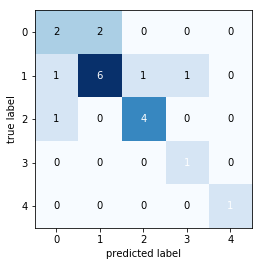

In [8]:
# EXECUTE BUT DO NOT MODIFY THIS CELL

from helper import plot_confusion_matrix


plot_confusion_matrix(result_matrix)
plt.show()

<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

### 2.3 [10 pts] Binary Confusion Matrices for Multiclass Problems

In this exercise, you will be building binary confusion matrices for multiclass problems as discussed in class when we talked about computing the balanced accuracy. Here, you can reuse the `confusion_matrix_binary` function you implemented in 2.1. 

Remember, if we are given 5 class labels (0, ..., 4) then we can construct 5 binary confusion matrices, where each time one of the 5 classes is assigned the positive class where all other classes will be considered as the negative class. The `positive_label` argument in the `binary_cm_from_multiclass` function below can be used to determine which class label refers to the positive class.

Implementing the function below is actually very easy and should only require you to add 2 lines of code with the help of the `np.where` function. 

In [ ]:
## FOR STUDENTS

def binary_cm_from_multiclass(y_true, y_predicted, positive_label):
    
    y_true_ary = np.array(y_true)
    y_predicted_ary = np.array(y_predicted)
    
    y_true_mod = np.where( # YOUR CODE
    y_predicted_mod = np.where( # YOUR CODE
    
    cm = confusion_matrix_binary(y_true_mod, y_predicted_mod)
    return cm

In [9]:
## SOLUTION

def binary_cm_from_multiclass(y_true, y_predicted, positive_label):
    
    y_true_ary = np.array(y_true)
    y_predicted_ary = np.array(y_predicted)
    
    y_true_mod = np.where(y_true_ary == positive_label, 0, 1)
    y_predicted_mod = np.where(y_predicted_ary == positive_label, 0, 1)
    
    cm = confusion_matrix_binary(y_true_mod, y_predicted_mod)
    return cm


As a hint, the expected output for label 0 as positive label is shown below:

Positive Label 0:
 [[ 2  2]
 [ 2 14]]


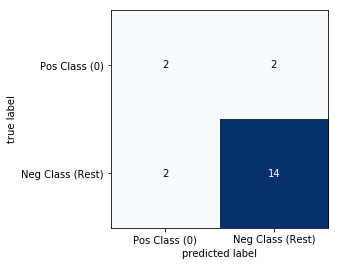

In [10]:
# EXECUTE BUT DO NOT MODIFY THIS CELL


y_true =      [1, 1, 1, 1, 0, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0]
y_predicted = [1, 0, 1, 1, 0, 2, 1, 3, 4, 2, 2, 0, 2, 1, 2, 1, 0, 3, 1, 1]


mat_pos0 = binary_cm_from_multiclass(y_true, y_predicted, positive_label=0)
print('Positive Label 0:\n', mat_pos0)

fig, ax = plot_confusion_matrix(mat_pos0)
ax.set_xticklabels(['', 'Pos Class (0)', 'Neg Class (Rest)'])
ax.set_yticklabels(['', 'Pos Class (0)', 'Neg Class (Rest)']);



Positive Label 1:
 [[6 3]
 [2 9]]


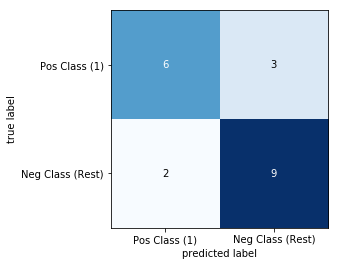

In [11]:
# EXECUTE BUT DO NOT MODIFY THIS CELL

mat_pos1 = binary_cm_from_multiclass(y_true, y_predicted, positive_label=1)
print('\n\nPositive Label 1:\n', mat_pos1)

fig, ax = plot_confusion_matrix(mat_pos1)
ax.set_xticklabels(['', 'Pos Class (1)', 'Neg Class (Rest)'])
ax.set_yticklabels(['', 'Pos Class (1)', 'Neg Class (Rest)']);

plt.show()

<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

## 3. [10 pts] Balanced Accuracy

Based on our discussion in class, implement a function that computes the balanced accuracy. You can implement the accuracy whatever way you like using Python and NumPy. Note that you can also re-use the binary confusion matrix code and the `binary_cm_from_multiclass` code if you like (but you don't have to).

Below is a template that you can use that does not require code from the previous exercises (but you can write the function in a different way if you like as long as it gives the correct results).

In [ ]:
# FOR STUDENTS

import numpy as np


def balanced_accuracy(y_true, y_predicted):
    
    y_true_ary = np.array(y_true)
    y_predicted_ary = np.array(y_predicted)
    
    unique_labels = np.unique(np.concatenate((y_true_ary, y_predicted_ary)))
    class_accuracies = []
    for l in unique_labels:
        # YOUR CODE HERE
        # YOUR CODE HERE
        # YOUR CODE HERE
        class_accuracies.append(acc)
    return np.mean(class_accuracies)

In [12]:
# SOLUTION

import numpy as np


def balanced_accuracy(y_true, y_predicted):
    
    y_true_ary = np.array(y_true)
    y_predicted_ary = np.array(y_predicted)
    
    unique_labels = np.unique(np.concatenate((y_true_ary, y_predicted_ary)))
    class_accuracies = []
    for l in unique_labels:
        binary_y_true = np.where(y_true_ary == l, 1, 0)
        binary_y_pred = np.where(y_predicted_ary == l, 1, 0)
        acc = (binary_y_true == binary_y_pred).mean()
        class_accuracies.append(acc)
    return np.mean(class_accuracies)

In [13]:
# EXECUTE BUT DO NOT MODIFY THIS CELL

y_targ = [1, 1, 2, 1, 1, 2, 0, 3]
y_pred = [0, 0, 2, 1, 1, 2, 1, 3]
    
balanced_accuracy(y_targ, y_pred)

0.8125

<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

## 4. Receiver Operater Characteristic (ROC)

### 4.1 [10 pts]  Plotting a ROC Curve

In this exercise, you are asked to plot a ROC curve. You are given a 2D array of probability values (`y_probabilities`; see next code cells) where 
- a value in the first column refer to the probability that a given test example (each row is one test example) belongs to class 0
- a value in the second column refer to the probability that a given test example belongs to class 1

In [1]:
# EXECUTE BUT DO NOT MODIFY THIS CELL


from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X, y = iris_data()
X, y = X[:100, [1]], y[:100]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0, stratify=y)

model = LogisticRegression(solver='lbfgs', random_state=123)
model.fit(X_train, y_train)

y_probabilities = model.predict_proba(X_test)

print(y_probabilities)

[[0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.50487831 0.49512169]
 [0.74306586 0.25693414]
 [0.89133165 0.10866835]
 [0.74306586 0.25693414]
 [0.44001556 0.55998444]
 [0.74306586 0.25693414]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.74306586 0.25693414]
 [0.50487831 0.49512169]
 [0.56957726 0.43042274]
 [0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.50487831 0.49512169]
 [0.05482486 0.94517514]
 [0.82965589 0.17034411]
 [0.86339788 0.13660212]
 [0.17593095 0.82406905]
 [0.50487831 0.49512169]
 [0.3771385  0.6228615 ]
 [0.31814182 0.68185818]
 [0.74306586 0.25693414]
 [0.50487831 0.49512169]
 [0.17593095 0.82406905]
 [0.44001556 0.55998444]
 [0.3771385  0.6228615 ]
 [0.6319844  0.3680156 ]
 [0.44001556 0.55998444]
 [0.3771385  0.6228615 ]


For this exercise, these scores are probabilities here, but scores can be obtained from an arbitrary classifier (ROC curves are not limited to logistic regression classifiers). For instance, in k-nearest neighbor classifiers, we can consider the fraction of the majority class labels and number of neighbors as the score. In decision tree classifiers, the score can be calculated as the ratio of the majority class labels and number of data points at a given node.

(In case you are curious, 'lbfgs' stands for Limited-memory BFGS, which is an optimization algorithm in the family of quasi-Newton methods that approximates the Broyden–Fletcher–Goldfarb–Shanno; not important to know here though.) 

**Note: You should only use Python base functions, NumPy, and matplotlib to get full points (do not use other external libraries)**

The `pos_label` argument is used to specify the positive label and the threshold. For instance, if we are given score
0.8, this score refers to the "probability" of the positive label. Assuming that the positive label is 1, this refers to a 80% probability that the true class label is 1. 

- Note that in the `y_probabilities` array, the second column refers to the probabilities of class label 1.
- The `plot_roc_curve` function should only receive a 1D array for `y_score`. E.g., 

if `y_probabilities` is 

```
[[0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.50487831 0.49512169]
 [0.74306586 0.25693414]
```
 
The `y_score` array is expected to be 

a) `y_score = [0.5599..., 0.3097..., 0.6818..., 0.4304..., ...]` for `pos_label=1`

and 

b) `y_score = [0.4400..., 0.6902..., 0.3181..., 0.5695..., ...]` for `pos_label=0`

In [ ]:
# FOR STUDENTS


import matplotlib.pyplot as plt
import numpy as np


def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=100):

    y_true_ary = np.array(y_true)
    y_score_ary = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)

    num_positives = # YOUR CODE
    num_negatives = # YOUR CODE

    for i, thr in enumerate(thresholds):
        
        binarized_scores = np.where(y_score >= thr, pos_label, int(not pos_label))
        
        positive_predictions = # YOUR CODE
        num_true_positives = # YOUR CODE
        num_false_positives = # YOUR CODE
        
        x_axis_values.append(# YOUR CODE)
        y_axis_values.append(# YOUR CODE)

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    return None

In [2]:
# SOLUTION


import matplotlib.pyplot as plt
import numpy as np


def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=100):

    y_true_ary = np.array(y_true)
    y_score_ary = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)

    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives

    for i, thr in enumerate(thresholds):
        
        binarized_scores = np.where(y_score >= thr, pos_label, int(not pos_label))
        
        positive_predictions = (binarized_scores == pos_label)
        num_true_positives = (y_true[positive_predictions] == pos_label).sum()
        num_false_positives = (y_true[positive_predictions] != pos_label).sum()
        
        x_axis_values.append(num_false_positives / float(num_negatives))
        y_axis_values.append(num_true_positives / float(num_positives))

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    return None

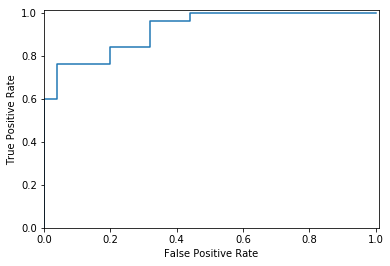

In [5]:
# EXECUTE BUT DO NOT MODIFY THIS CELL

plot_roc_curve(y_test, y_probabilities[:, 1], pos_label=1)
plt.show()

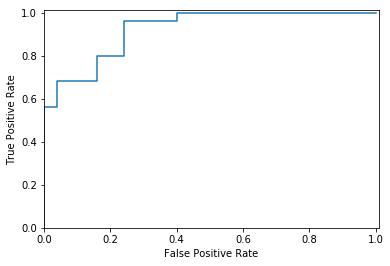

In [6]:
# EXECUTE BUT DO NOT MODIFY THIS CELL

plot_roc_curve(y_test, y_probabilities[:, 0], pos_label=0)
plt.show()

<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

### 4.2 [10 pts] Calculating the ROC AUC

In this exercise, you are asked to modify your previous `plot_roc_curve` function to compute the ROC area under the curve (ROC AUC). To compute the ROC AUC, you can use NumPy's `trapz` function for your convenience (https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.trapz.html).

- As before, you should only use basic Python functions, NumPy, and matplotlib to get full points for this exercise (do not use other external libraries)

In [ ]:
# FOR STUDENTS


def plot_roc_curve_plus_auc(y_true, y_score, pos_label=1, num_thresholds=100):

    # INSERT YOUR CODE FROM THE PREVIOUS EXERCISE HERE
    # BUT MODIFY IT SUCH THAT IT ALSO RETURNS THE
    # ROC Area Under the Curve
    return roc_auc

In [7]:
# SOLUTION


def plot_roc_curve_plus_auc(y_true, y_score, pos_label=1, num_thresholds=100):

    y_true_ary = np.array(y_true)
    y_score_ary = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)

    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives

    for i, thr in enumerate(thresholds):
        
        binarized_scores = np.where(y_score >= thr, pos_label, int(not pos_label))
        
        positive_predictions = (binarized_scores == pos_label)
        num_true_positives = (y_true[positive_predictions] == pos_label).sum()
        num_false_positives = (y_true[positive_predictions] != pos_label).sum()
        
        x_axis_values.append(num_false_positives / float(num_negatives))
        y_axis_values.append(num_true_positives / float(num_positives))

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    roc_auc = 1 + np.trapz(x_axis_values, y_axis_values)
    return roc_auc

1) Calculate the ROC AUC for the positive class label 0

ROC AUC: 0.8968


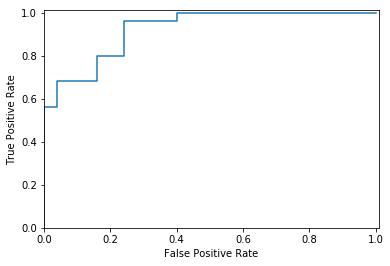

In [9]:
# DON'T MODIFY BUT EXECUTE THIS CELL TO SHOW YOUR SOLUTION

auc = plot_roc_curve_plus_auc(y_test, y_probabilities[:, 0], pos_label=0)
print('ROC AUC: %.4f' % auc)

2) Calculate the ROC AUC for the positive class label 1

ROC AUC: 0.8968


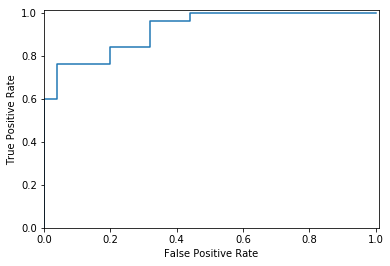

In [11]:
# DON'T MODIFY BUT EXECUTE THIS CELL TO SHOW YOUR SOLUTION

auc = plot_roc_curve_plus_auc(y_test, y_probabilities[:, 1], pos_label=1)
print('ROC AUC: %.4f' % auc)

<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

## 5. Feature Importance

### [10 pts] 5.1 Drop-Column Feature Importance

In this exercise, you are asked to implement the "drop-column feature importance" method discussed in class, to measure the importance of individual features present in a dataset.


- You will be using regular accuracy measure as performance metric
- Use 5 fold cross-validation to compute the accuracies

The dataset you will be using for this exercise is the so-called "Wine" dataset. 

The Wine dataset is another open-source dataset that is available from the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Wine); it consists of 178 wine samples with 13 features describing their different chemical properties.

The 13 different features in the Wine dataset, describing the chemical properties of the 178 wine samples, are listed in the following table that you will see after executing the next code cell.


In [1]:
# EXECUTE BUT DO NOT MODIFY THIS CELL


import pandas as pd

df_wine = pd.read_csv('data/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The samples belong to one of three different classes, 1, 2, and 3, which refer to the three different types of grape grown in the same region in Italy but derived from different wine cultivars, as described in the dataset summary (https://archive. ics.uci.edu/ml/machine-learning-databases/wine/wine.names).

In [2]:
# EXECUTE BUT DO NOT MODIFY THIS CELL


from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

Now the task is to implement the `feature_importance_dropcolumn` function to compute the feature importance according the Drop-Column method discussed in class. Here, use the `cross_val_score` function from scikit-learn to compute the acccuracy as the average accuracy from 5-fold cross-validation.

In [ ]:
# FOR STUDENTS


import numpy as np
from sklearn.model_selection import cross_val_score


def feature_importance_dropcolumn(estimator, X, y, cv=5):

    base_accuracy = # YOUR CODE
    column_indices = np.arange(X.shape[1]).astype(int)
    drop_accuracies = np.zeros(column_indices.shape[0])
    
    for idx in column_indices:
        mask = np.ones(column_indices.shape[0]).astype(bool)
        mask[idx] = False
        drop_accuracy = # YOUR CODE
        drop_accuracies[idx] = # YOUR CODE
        
    return drop_accuracies

In [3]:
# SOLUTION


import numpy as np
from sklearn.model_selection import cross_val_score


def feature_importance_dropcolumn(estimator, X, y, cv=5):

    base_accuracy = np.mean(cross_val_score(estimator, X, y, cv=cv))
    column_indices = np.arange(X.shape[1]).astype(int)
    drop_accuracies = np.zeros(column_indices.shape[0])
    
    for idx in column_indices:
        mask = np.ones(column_indices.shape[0]).astype(bool)
        mask[idx] = False
        drop_accuracy = base_accuracy - np.mean(cross_val_score(estimator, X[:, mask], y, cv=cv))
        drop_accuracies[idx] = drop_accuracy
        
    return drop_accuracies

Next, apply the `feature_importance_dropcolumn` function to the Wine training dataset (`X_train`, `y_train`) on a `KNeighborsClassifier` (you should use the `make_pipeline` function to create an estimator where the features are scaled to z-scores via the `StandardScaler`, since `KNeighborsClassifier` is very sensitive to feature scales).

- You should use a `KNeighborsClassifier` with 5 nearest neighbors.

In [ ]:
# FOR STUDENTS

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier



pipe = make_pipeline(
    # YOUR CODE
    # YOUE CODE
)


feature_importance_dropcolumn(# YOUR CODE)

In [4]:
# SOLUTION

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier



pipe = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)


feature_importance_dropcolumn(estimator=pipe, X=X_train, y=y_train, cv=5)

array([ 0.009     ,  0.00033333,  0.008     ,  0.01633333,  0.00766667,
        0.00802564,  0.01569231, -0.00833333, -0.00030769, -0.008     ,
       -0.00030769,  0.00769231,  0.02402564])

<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

### [10 pts] 5.2 Random Forest Feature Importance

First, use a `RandomForestClassifier` in your `feature_importance_dropcolumn` from the previous exercise, 5.1. Use a random forest 

- with 200 estimators and 
- random seed 0. 

In [ ]:
# FOR STUDENTS


from sklearn.ensemble import RandomForestClassifier


drop_importances = feature_importance_dropcolumn(
                              # YOUR CODE]
                              X=X_train, 
                              y=y_train,
                              cv=5)


print('Drop Importance from RF:', drop_importances)

In [5]:
# SOLUTION


from sklearn.ensemble import RandomForestClassifier


drop_importances = feature_importance_dropcolumn(
                              estimator=RandomForestClassifier(n_estimators=100, random_state=0),
                              X=X_train, 
                              y=y_train,
                              cv=5)


print('Drop Importance from RF:', drop_importances)

Drop Importance from RF: [ 0.01602564  0.         -0.00864103 -0.00030769 -0.00064103 -0.01664103
 -0.00864103 -0.00833333 -0.01633333 -0.00030769 -0.00833333 -0.01633333
 -0.016     ]


Next, compute the ranking among the features as determined by the outputs of the previous code cell, saved under `drop_importances`. You may use `np.argsort` in your computation, to compute the ranking, where the highest number should correspond to the most important feature.

In [ ]:
# FOR STUDENTS


# YOUR CODE

In [6]:
# SOLUTION


np.argsort(np.abs(drop_importances))

array([ 1,  3,  9,  4,  7, 10,  2,  6, 12,  0,  8, 11,  5])

Which are the 3 most important features? You can either write the feature indices below that correspond to the most important features or write out the full column names (you can see the column names in the pandas `DataFrame` in 5.1).

!!! **EDIT THIS CELL TO ENTER YOUR ANSWER** !!!

<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

Next, obtain the feature importance from the random forest classifier directly and compute the ranking as before.

In [ ]:
# FOR STUDENTS

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Random Forest Feature Importance:\n', # YOUR CODE)

In [7]:
# SOLUTION

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Random Forest Feature Importance:\n', forest.feature_importances_)

Random Forest Feature Importance:
 [0.10555438 0.02752069 0.01151643 0.01129616 0.03584676 0.05578069
 0.16796338 0.01228992 0.02496121 0.16764694 0.06234868 0.13362561
 0.18364915]


In [ ]:
# FOR STUDENTS


# YOUR CODE TO RANK THE FEATURES

In [8]:
# SOLUTION

np.argsort(forest.feature_importances_)

array([ 3,  2,  7,  8,  1,  4,  5, 10,  0, 11,  9,  6, 12])

Which are the 3 most important features now? You can either write the feature indices below that correspond to the most important features or write out the full column names (you can see the column names in the pandas `DataFrame` in 5.1).

!!! **EDIT THIS CELL TO ENTER YOUR ANSWER** !!!

<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

Finally, use the `feature_importance_permutation` function from mlxtend (http://rasbt.github.io/mlxtend/user_guide/evaluate/feature_importance_permutation/) to compute the most important features. Inside `the feature_importance_permutation` function,

- use a random seed of 0
- use 50 permutation rounds

then print the importance values.

In [ ]:
# FOR STUDENTS


from mlxtend.evaluate import feature_importance_permutation


forest = RandomForestClassifier(n_estimators=100,
                                random_state=0)

forest.fit(X_train, y_train)

# YOUR CODE

In [9]:
# SOLUTION


from mlxtend.evaluate import feature_importance_permutation


forest = RandomForestClassifier(n_estimators=100,
                                random_state=0)

forest.fit(X_train, y_train)

imp_vals, _ = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_train,
    y=y_train,
    metric='accuracy',
    num_rounds=50,
    seed=0)

print(imp_vals)

[0.00548387 0.         0.         0.         0.         0.
 0.01725806 0.         0.         0.01403226 0.         0.00596774
 0.03387097]


In [ ]:
# FOR STUDENTS


# YOUR CODE TO RANK THE FEATURES

In [10]:
# SOLUTION

np.argsort(imp_vals)

array([ 1,  2,  3,  4,  5,  7,  8, 10,  0, 11,  9,  6, 12])

Which are the 3 most important features now? You can either write the feature indices below that correspond to the most important features or write out the full column names (you can see the column names in the pandas `DataFrame` in 5.1).

!!! **EDIT THIS CELL TO ENTER YOUR ANSWER** !!!

<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

### [10 pts] 5.3 Creating your Own Feature Selection Transformer Class

This section will help you understand how you can implement your own feature selection method in a way that is compatible with scikit-learn.

The following code (`ColumnSelector`) implements a feature selector that works similarly to the feature selctors implemented in scikit-learn. However, this `ColumnSelector` does not do anything automatically.

In [11]:
# EXECUTE BUT DO NOT EDIT THIS CELL

from sklearn.base import BaseEstimator
import numpy as np


class ColumnSelector(BaseEstimator):

    def __init__(self, cols=None):
        self.cols = cols

    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)

    def transform(self, X, y=None):
        feature_subset = X[:, self.cols]
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset

    def fit(self, X, y=None):
        return self

As the name implies, we `ColumnSelector` selects specific columns that we as the user need to specify. For example, consider the Wine dataset from earlier:

In [12]:
# EXECUTE BUT DO NOT EDIT THIS CELL

import pandas as pd

df_wine = pd.read_csv('data/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# EXECUTE BUT DO NOT EDIT THIS CELL

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

Via the `ColumnSelector`, we can select select specific columns from the dataset. E.g., to select the 1st, 6th, and 9th column, and 12th column, we can initialize the `ColumnSelector` with the argument `cols=[0, 5, 8, 11]` and use the transform method as shown below:

In [14]:
# EXECUTE BUT DO NOT EDIT THIS CELL

col_sele = ColumnSelector(cols=[0, 5, 8, 11])
reduced_subset = col_sele.transform(X_train)

print('Original feature set size:', X_train.shape)
print('Selected feature set size:', reduced_subset.shape)

Original feature set size: (124, 13)
Selected feature set size: (124, 4)


Your task now is to use the `feature_importances_` attribute from a fitted random forest model inside a custom feature selector. Using this feature selector, you should be able to select features as follows:


```python

forest = RandomForestClassifier(n_estimators=100, random_state=123)

selector = ImportanceSelector(num_features=3, random_forest_estimator=forest)
selector.fit(X_train, y_train)
reduced_train_features = selector.transform(X_train, y_train)
```

- If `num_features=3` as shown above, this means that we are interested to select the top 3 most important features from a dataset based on the random forest feature importance values.


- Actually, while it might be more interesting to implement a feature selctor based on the column-drop performance (which would then be somewhat related to sequential feature selection), we use the feature importance values from a `RandomForest`'s `feature_importances_` attribute for simplicity here, to allow you to implement this method in case your `feature_importance_dropcolumn` function does not work correctly.

In [ ]:
# FOR STUDENTS

from sklearn.base import BaseEstimator
import numpy as np


class ImportanceSelector(BaseEstimator):

    def __init__(self, num_features, random_forest_estimator):
        self.num_features = num_features
        self.forest = random_forest_estimator

    def transform(self, X, y=None):
        
        # Feature by increasing feature importance:
        features_by_importance = # YOUR CODE
        top_k_feature_indices = # YOUR CODE
        
        feature_subset = X[:, top_k_feature_indices]
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset

    def fit(self, X, y=None):
        self.forest.fit(X, y)
        return self

In [15]:
# SOLUTION

from sklearn.base import BaseEstimator
import numpy as np


class ImportanceSelector(BaseEstimator):

    def __init__(self, num_features, random_forest_estimator):
        self.num_features = num_features
        self.forest = random_forest_estimator

    def transform(self, X, y=None):
        
        # Feature by increasing feature importance:
        features_by_importance = np.argsort(self.forest.feature_importances_)[::-1]
        top_k_feature_indices = features_by_importance[:self.num_features]
        
        feature_subset = X[:, top_k_feature_indices]
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset

    def fit(self, X, y=None):
        self.forest.fit(X, y)
        return self

Now, use the `ImportanceSelector` to select the 3 most important features in the dataset:

In [ ]:
# FOR STUDENTS

from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100, random_state=123)

selector = # YOUR CODE
# YOUR CODE
reduced_train_features = # YOUR CODE

print('Original feature set size:', X_train.shape)
print('Selected feature set size:', reduced_train_features.shape)
print('First 5 rows:\n', reduced_train_features[:5])

In [16]:
# SOLUTION

from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100, random_state=123)

selector = ImportanceSelector(num_features=3, random_forest_estimator=forest)
selector.fit(X_train, y_train)
reduced_train_features = selector.transform(X_train, y_train)

print('Original feature set size:', X_train.shape)
print('Selected feature set size:', reduced_train_features.shape)
print('First 5 rows:\n', reduced_train_features[:5])

Original feature set size: (124, 13)
Selected feature set size: (124, 3)
First 5 rows:
 [[5.500e+02 8.000e-01 4.400e+00]
 [1.235e+03 2.740e+00 5.400e+00]
 [1.285e+03 3.250e+00 5.700e+00]
 [1.095e+03 2.530e+00 4.200e+00]
 [6.950e+02 6.600e-01 7.100e+00]]


<div class="paragraph">
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
  <p><br></p>
</div>

## (5 pts) Bonus Exercise: Evaluating a KNN Classifier on Different Feature Subsets

In this *Bonus Exercise*, your task is to use a scikit-learn pipeline to fit a KNN classifier based on different 2-feature combinations and different values of *k* (number of neighbors) via grid search. More specifically,

1. Create a scikit-learn pipeline that consists of a `StandardScaler`, a `ColumnSelector`, and a `KNeighborsClassifeir` (think about the right way to order these elements in the pipeline);
2. Using this pipeline, find the best value for `k` in the KNN classifier as well as the best feature combination (restricted to 2-feature subsets for simplicity) using `GridSearchCV`;
3. Fit the best model determined via grid search on the whole training set and evaluate the performance on the test set.

In [1]:
# EXECUTE BUT DO NOT EDIT


import pandas as pd


df_wine = pd.read_csv('data/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# EXECUTE BUT DO NOT EDIT

from sklearn.model_selection import train_test_split


X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [5]:
# EXECUTE BUT DO NOT EDIT THIS CELL

from sklearn.base import BaseEstimator
import numpy as np


class ColumnSelector(BaseEstimator):

    def __init__(self, cols=None):
        self.cols = cols

    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)

    def transform(self, X, y=None):
        feature_subset = X[:, self.cols]
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset

    def fit(self, X, y=None):
        return self

Modify the following code cell to create a list of all possible 2-feature combinations:

In [ ]:
# FOP STUDENTS

import itertools


all_combin_2 = list(itertools.combinations( # YOUR CODE)


print('Number of all possible 2-feature combinations:', len(all_combin_2))

In [6]:
# SOLUTION

import itertools


all_combin_2 = list(itertools.combinations(range(X_train.shape[1]), 2))


print('Number of all possible 2-feature combinations:', len(all_combin_2))

Number of all possible 2-feature combinations: 78


Modify the following code cell to create a `pipeline` (as explained at the beginning of this section), and use the given `param_grid` to fit the `GridSearchCV` to obtain the best parameters settings and a classifier fit to `X_train` and `y_train` based on these best hyperparameter values.

(Note that the code may take 10-30 seconds to execute.)

In [ ]:
# FOR STUDENTS

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


pipe = make_pipeline(
# YOUR CODE
# YOUR CODE
# YOUR CODE
)


param_grid = {'kneighborsclassifier__n_neighbors': list(range(1, 8)),
              'columnselector__cols': all_combin_2}

gsearch = GridSearchCV(pipe,
                       param_grid=param_grid,
                       refit=True,
                       iid=False,
                       cv=5)

gsearch.fit(X_train, y_train)

In [7]:
# SOLUTION

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


pipe = make_pipeline(
    StandardScaler(),
    ColumnSelector(),
    KNeighborsClassifier()
)


param_grid = {'kneighborsclassifier__n_neighbors': list(range(1, 8)),
              'columnselector__cols': all_combin_2}

gsearch = GridSearchCV(pipe,
                       param_grid=param_grid,
                       refit=True,
                       iid=False,
                       cv=5)

gsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('columnselector', ColumnSelector(cols=None)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'columnselector__cols': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 3), (2, 4...7, 12), (8, 9), (8, 10), (8, 11), (8, 12), (9, 10), (9, 11), (9, 12), (10, 11), (10, 12), (11, 12)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
# EXECUTE BUT DO NOT EDIT


print(gsearch.best_params_)

{'columnselector__cols': (6, 9), 'kneighborsclassifier__n_neighbors': 5}


Based on the best combination of a 2-feature subset and the number of `n_neigbors` your model should be fit the the training dataset now. Use the fitted model and compute its classification accuracy on the test set (`X_test`, `y_test`).

In [ ]:
# FOR STUDENTS

# YOUR CODE TO COMPUTE THE TEST ACCURACY

In [9]:
# SOLUTION


print('Test accuracy %.2f%%' % (100* gsearch.best_estimator_.score(X_test, y_test)))

Test accuracy 92.59%
